In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [4]:
train

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

In [5]:
test

id  Gender        Age    Height      Weight  \
0      20758    Male  26.899886  1.848294  120.644178   
1      20759  Female  21.000000  1.600000   66.000000   
2      20760  Female  26.000000  1.643355  111.600553   
3      20761    Male  20.979254  1.553127  103.669116   
4      20762  Female  26.000000  1.627396  104.835346   
...      ...     ...        ...       ...         ...   
13835  34593    Male  23.327836  1.721384   78.030383   
13836  34594  Female  29.000000  1.590000   62.000000   
13837  34595  Female  22.935612  1.585547   44.376637   
13838  34596    Male  21.000000  1.620000   53.000000   
13839  34597    Male  26.490926  1.812259  120.980508   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.938616  3.000000   Sometimes   
1                                yes  yes  2.000000  1.000000   Sometimes   
2                                yes  yes  3.000000  3.000000   Sometimes   
3                                yes  yes  2.000000  2.977909   Sometimes   
4                                yes  yes  3.000000  3.000000   Sometimes   
...                              ...  ...       ...       ...         ...   
13835                            yes   no  2.813234  3.000000   Sometimes   
13836                             no  yes  3.000000  3.000000   Sometimes   
13837                             no  yes  3.000000  2.273740  Frequently   
13838                            yes  yes  2.000000  3.000000   Sometimes   
13839                            yes  yes  2.744994  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.825629  no  0.855400  0.000000  Sometimes   
1        no  3.000000  no  1.000000  0.000000  Sometimes   
2        no  2.621877  no  0.000000  0.250502  Sometimes   
3        no  2.786417  no  0.094851  0.000000  Sometimes   
4        no  2.653531  no  0.000000  0.741069  Sometimes   
...     ...       ...  ..       ...       ...        ...   
13835    no  1.000000  no  0.807076  0.778632  Sometimes   
13836    no  2.000000  no  0.000000  0.000000  Sometimes   
13837    no  2.000000  no  1.949840  1.000000  Sometimes   
13838    no  2.000000  no  3.000000  2.000000         no   
13839    no  2.205977  no  1.304291  0.630866  Sometimes   

                      MTRANS  
0      Public_Transportation  
1      Public_Transportation  
2      Public_Transportation  
3      Public_Transportation  
4      Public_Transportation  
...                      ...  
13835  Public_Transportation  
13836  Public_Transportation  
13837  Public_Transportation  
13838  Public_Transportation  
13839  Public_Transportation  

[13840 rows x 17 columns]

In [6]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

**Data terminologies**

FAVC : Frequent_consumption_of_high_caloric_food

FCVC : Frequency of consumption of vegetables

NCP : Number of main meals

CAEC : Consumption of food between meals

SMOKE : Smoking

CH2O : Consumption of water daily

SCC : Calories consumption monitoring

FAF : Physical activity frequency

TUE : Time using technology devices

CALC : Consumption of alcohol

MTRANS : Transportation used

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# EDA

In [9]:
train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [10]:
sns.countplot(train['NObeyesdad'])

`So, there are 4000 people among the data are suffering from Obesitty_Type_III`

**Let's calculate teh percentage of the 'NObeyesdad' column**

In [11]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [12]:
Overweight_Level_II_count = 2522
Normal_Weight_count = 3082
Insufficient_Weight_count =2523
Obesity_Type_III_count = 4046
Obesity_Type_II_count = 3248
Overweight_Level_I_count = 2427
Obesity_Type_I_count = 2910

In [13]:
total_count = Overweight_Level_II_count+Normal_Weight_count+Insufficient_Weight_count+Obesity_Type_III_count+Obesity_Type_II_count+Overweight_Level_I_count+Obesity_Type_I_count
total_count

20758

In [14]:
Overweight_Level_II_percentage = (Overweight_Level_II_count/total_count)*100
Normal_Weight_percentage = (Normal_Weight_count/total_count)*100
Insufficient_Weight_percentage = (Insufficient_Weight_count/total_count)*100
Obesity_Type_III_percentage = (Obesity_Type_III_count/total_count)*100
Obesity_Type_II_percentage = (Obesity_Type_II_count/total_count)*100
Overweight_Level_I_percentage = (Overweight_Level_I_count/total_count)*100
Obesity_Type_I_percentage = (Obesity_Type_I_count/total_count)*100

In [15]:
print(f'Overweight_Level_II_percentage = {Overweight_Level_II_percentage:2f}%')
print(f'Normal_Weight_percentage = {Normal_Weight_percentage:2f}%')
print(f'Insufficient_Weight_percentage = {Insufficient_Weight_percentage:2f}%')
print(f'Obesity_Type_III_percentage = {Obesity_Type_III_percentage:2f}%')
print(f'Obesity_Type_II_percentage = {Obesity_Type_II_percentage:2f}%')
print(f'Overweight_Level_I_percentage = {Overweight_Level_I_percentage:2f}%')
print(f'Obesity_Type_I_percentage = {Obesity_Type_I_percentage:2f}%')

Overweight_Level_II_percentage = 12.149533%
Normal_Weight_percentage = 14.847288%
Insufficient_Weight_percentage = 12.154350%
Obesity_Type_III_percentage = 19.491280%
Obesity_Type_II_percentage = 15.646979%
Overweight_Level_I_percentage = 11.691878%
Obesity_Type_I_percentage = 14.018692%


**Bargraph between gender and NObeyesdad column**

In [16]:
df=train

In [17]:
plt.figure(figsize=(10,6))
fig = px.bar(df,x=train['NObeyesdad'],color=train['Gender'])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


<Figure size 1000x600 with 0 Axes>

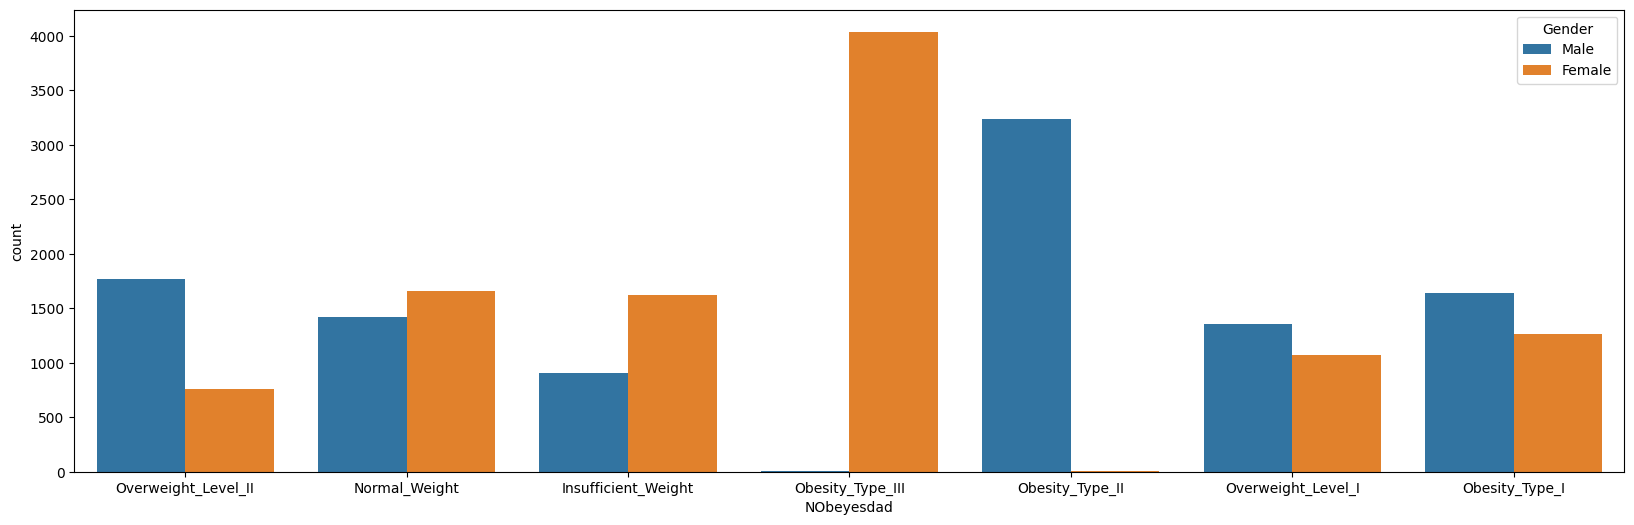

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x=train['NObeyesdad'],hue=train['Gender'])
plt.show()

**Let's see the obesity level with age**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Age', ylabel='Count'>

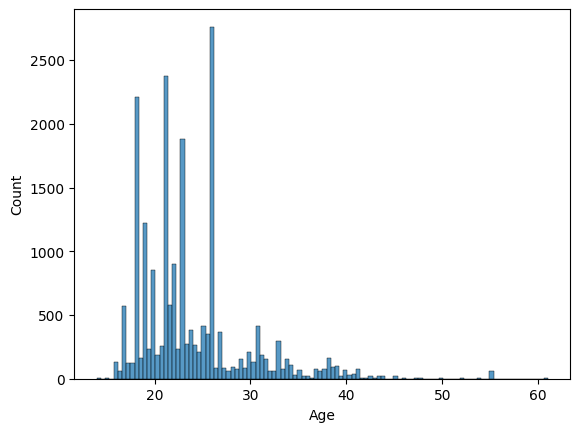

In [19]:
sns.histplot(train['Age'])

`According to the data maximum 15-27 age group people are more in the data`

In [20]:
fig = px.histogram(df,x=train['Age'],color=train['NObeyesdad'])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Let's see the family history did affect in obesity or not**

In [21]:
train['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [22]:
train['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [23]:
yes_count = 17014
no_count = 3744
total_c = yes_count+no_count

In [24]:
yes_per = (yes_count/total_c)*100
no_per = (no_count/total_c)*100

In [25]:
print(f'Having a Overweight family history = {yes_per:2f}%')
print(f'Having a No Overweight family history = {no_per:2f}%')

Having a Overweight family history = 81.963580%
Having a No Overweight family history = 18.036420%


`Over 81% of people in the data having overweight family history`

**People using technologies and travelling through transport**

In [26]:
fig = px.histogram(df,train['TUE'],color=train['MTRANS'])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



`People travelling through Public_transport and by Automobile are using more technologies than other transportaion medium`

**Can alcohol causing obesity**

In [27]:
fig = px.histogram(df,x=train['NObeyesdad'],color=train['CALC'])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



`After observing the poeple consuming alcohol sometimes are more affect with 'obesity_type_III' and the people which are not consuming alcohol are also affect by different kind of weight disorder but the ones who drank daily are less affected as compare to other but they are more affected with 'overweight_level_II'`

**Relationship between Age and Weight**

In [28]:
fig = px.scatter(df,x=train['Height'],y=train['Weight'])
fig.show()

`There is a kind of linear relationship but not that much`

**let's see how columns are alinged and skewness in the columns**

<Axes: ylabel='Age'>

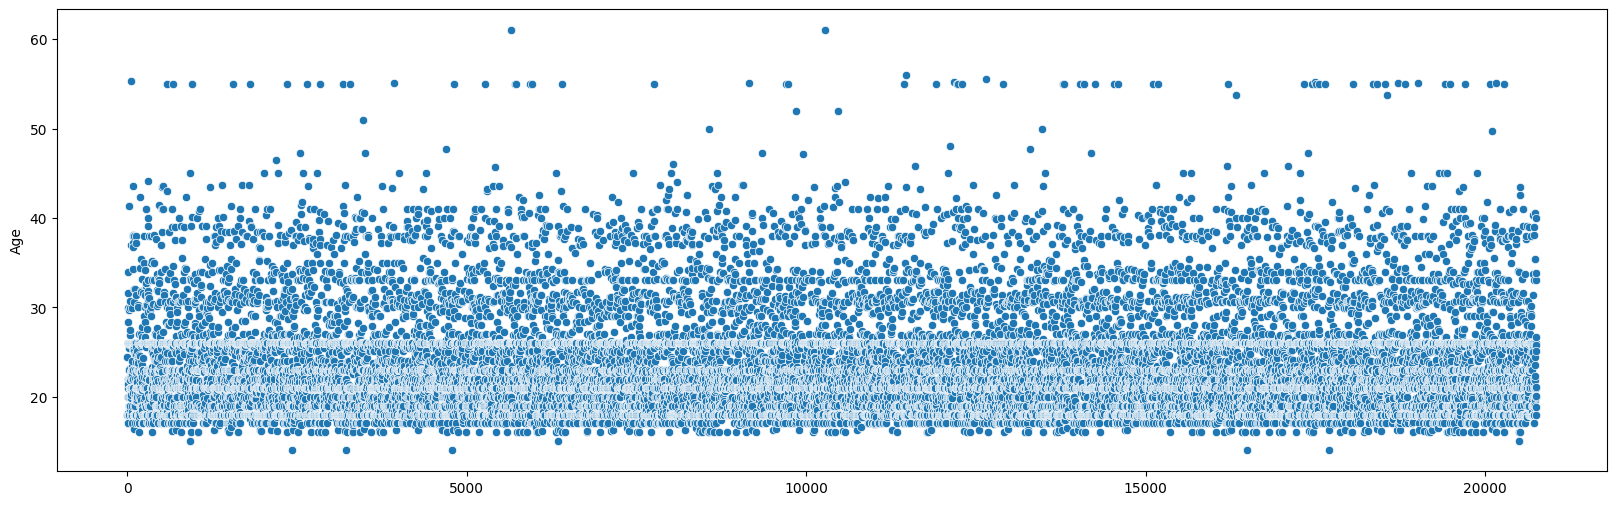

In [29]:
plt.figure(figsize=(20,6))
sns.scatterplot(train['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Age', ylabel='Density'>

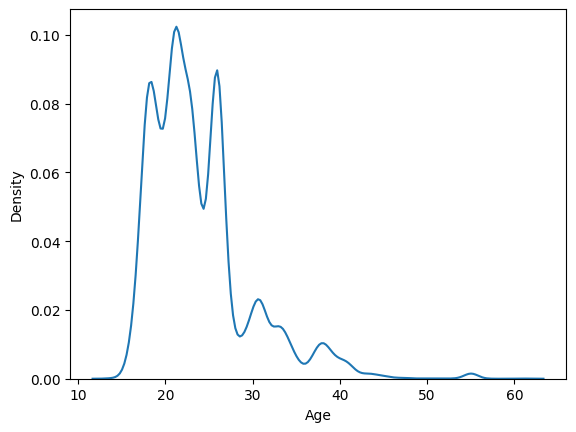

In [30]:
sns.kdeplot(train['Age'])

**Correcting the skewnees in the data**

In [31]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

ft = FunctionTransformer(func=np.log1p)

In [32]:
train['Age'] = ft.fit_transform(train['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Age', ylabel='Density'>

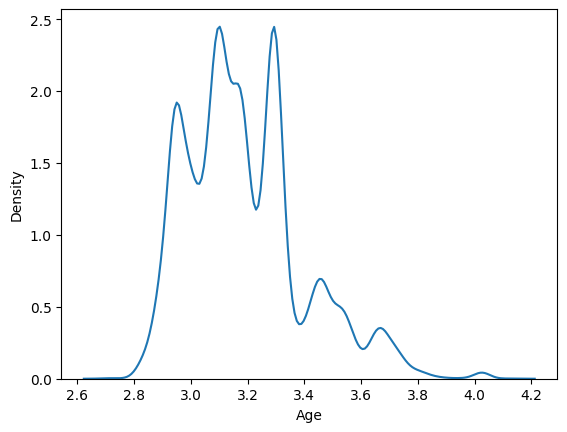

In [33]:
sns.kdeplot(train['Age'])

**Comparing both kde plot**

**Before comparing we have to split the data for better visualize the comparing side**

In [34]:
from sklearn.model_selection import train_test_split

X = train.drop(['NObeyesdad'],axis=1)
y = train['NObeyesdad']

In [35]:
X

id  Gender       Age    Height      Weight  \
0          0    Male  3.236441  1.699998   81.669950   
1          1  Female  2.944439  1.560000   57.000000   
2          2  Female  2.944439  1.711460   50.165754   
3          3  Female  3.088892  1.710730  131.274851   
4          4    Male  3.485572  1.914186   93.798055   
...      ...     ...       ...       ...         ...   
20753  20753    Male  3.263355  1.766626  114.187096   
20754  20754    Male  2.944439  1.710000   50.000000   
20755  20755    Male  3.049322  1.819557  105.580491   
20756  20756    Male  3.551138  1.700000   83.520113   
20757  20757    Male  3.320724  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS  
0      Public_Transportation  
1                 Automobile  
2      Public_Transportation  
3      Public_Transportation  
4      Public_Transportation  
...                      ...  
20753  Public_Transportation  
20754  Public_Transportation  
20755  Public_Transportation  
20756             Automobile  
20757  Public_Transportation  

[20758 rows x 17 columns]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
X_train

id  Gender       Age    Height      Weight  \
860      860  Female  3.295837  1.650125  111.939671   
17270  17270  Female  3.730568  1.568543   80.000000   
11512  11512    Male  3.451629  1.726774  102.872505   
5553    5553    Male  3.091042  1.700000   80.000000   
19566  19566  Female  3.178054  1.530000   45.000000   
...      ...     ...       ...       ...         ...   
1099    1099  Female  3.195650  1.746516  133.485478   
18898  18898  Female  3.332205  1.620000   68.000000   
11798  11798    Male  3.178054  1.850000   75.000000   
6637    6637    Male  3.251358  1.825449  120.901591   
2575    2575    Male  3.091800  1.874519  106.421042   

      family_history_with_overweight FAVC      FCVC  NCP       CAEC SMOKE  \
860                              yes  yes  3.000000  3.0  Sometimes    no   
17270                            yes  yes  2.000000  1.0  Sometimes    no   
11512                            yes  yes  2.661556  3.0  Sometimes    no   
5553                             yes  yes  3.000000  3.0  Sometimes    no   
19566                             no  yes  3.000000  3.0  Sometimes    no   
...                              ...  ...       ...  ...        ...   ...   
1099                             yes  yes  3.000000  3.0  Sometimes    no   
18898                             no  yes  1.000000  1.0  Sometimes    no   
11798                            yes  yes  3.000000  3.0  Sometimes    no   
6637                             yes  yes  2.016950  3.0  Sometimes    no   
2575                             yes  yes  2.000000  3.0  Sometimes    no   

           CH2O  SCC       FAF       TUE       CALC                 MTRANS  
860    2.770732   no  0.000000  0.237307  Sometimes  Public_Transportation  
17270  1.326165   no  0.000000  0.000000  Sometimes             Automobile  
11512  1.791286   no  0.684487  0.000000  Sometimes  Public_Transportation  
5553   1.000000   no  2.000000  1.000000         no  Public_Transportation  
19566  2.000000  yes  2.000000  0.000000  Sometimes  Public_Transportation  
...         ...  ...       ...       ...        ...                    ...  
1099   2.613928   no  1.541072  0.803141  Sometimes  Public_Transportation  
18898  2.000000   no  1.000000  0.000000  Sometimes             Automobile  
11798  1.000000   no  0.000000  1.000000         no             Automobile  
6637   2.548527   no  0.941410  0.081156  Sometimes  Public_Transportation  
2575   2.839069   no  3.000000  1.415536  Sometimes  Public_Transportation  

[16606 rows x 17 columns]

In [38]:
ft = FunctionTransformer(func=np.log1p)

X_train['Age'] = ft.fit_transform(X_train['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



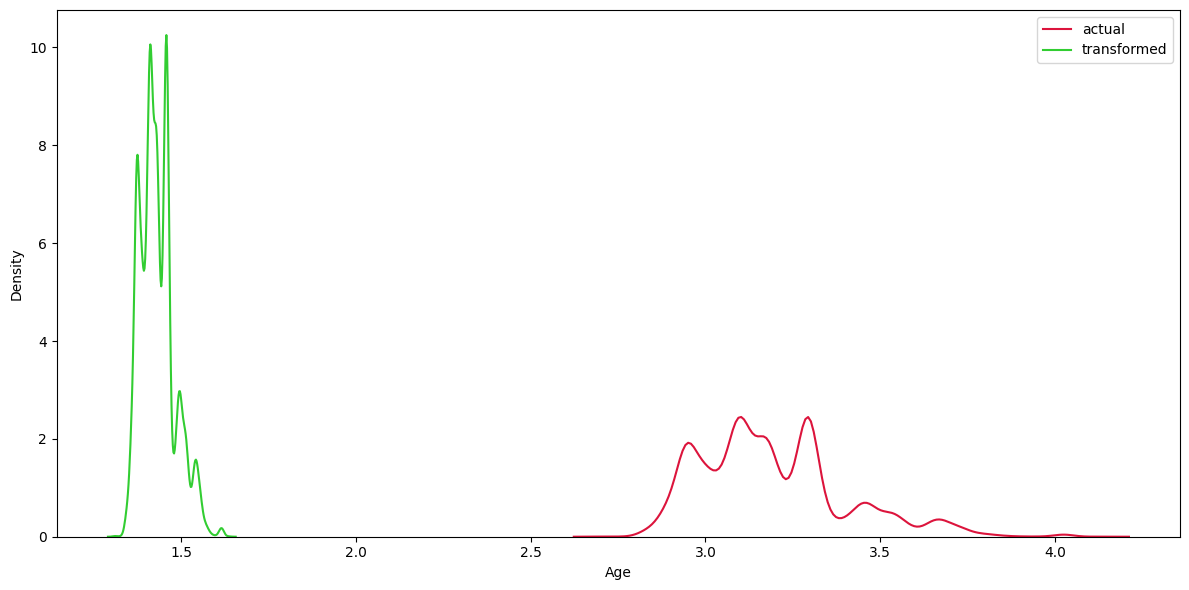

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(train['Age'],color='crimson', label='actual', ax=ax)

sns.kdeplot(X_train['Age'],color='limegreen', label='transformed', ax=ax)

ax.legend()
plt.tight_layout()
plt.show()

**Side by Side comparsion of both actual and transformed on**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



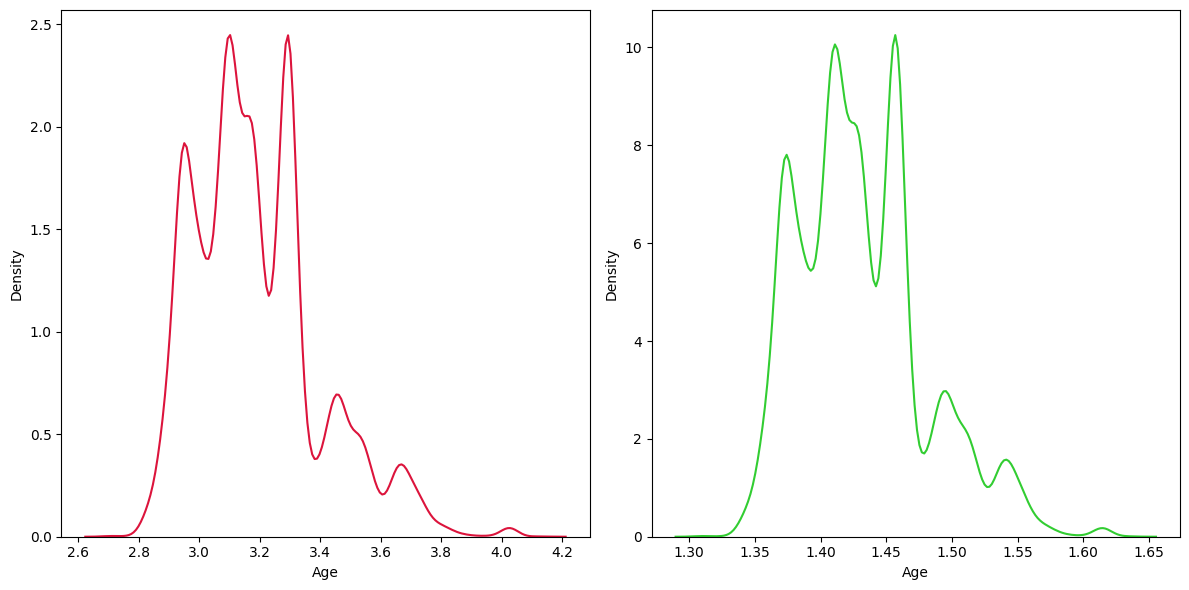

In [40]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12, 6))

sns.kdeplot(train['Age'],color='crimson', label='actual', ax=ax1)

sns.kdeplot(X_train['Age'],color='limegreen', label='transformed', ax=ax2)

ax.legend()
plt.tight_layout()
plt.show()

**Now making a function that will give all kind of transformation and creating graphs as well**

In [41]:
def apply_transform(transform,column):
  X = train.drop(['NObeyesdad'],axis=1)
  y = train['NObeyesdad']

  trf = ColumnTransformer([
      ('log',FunctionTransformer(transform),[column])
  ],remainder='passthrough')

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  X_train[column] = ft.fit_transform(X_train[column])

  fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12, 6))
  plt.title('Actual')
  sns.kdeplot(train[column],color='crimson', ax=ax1)


  plt.title('Transform')
  sns.kdeplot(X_train[column],color='limegreen', ax=ax2)

  ax.legend()
  plt.tight_layout()
  plt.show()

`square func`

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



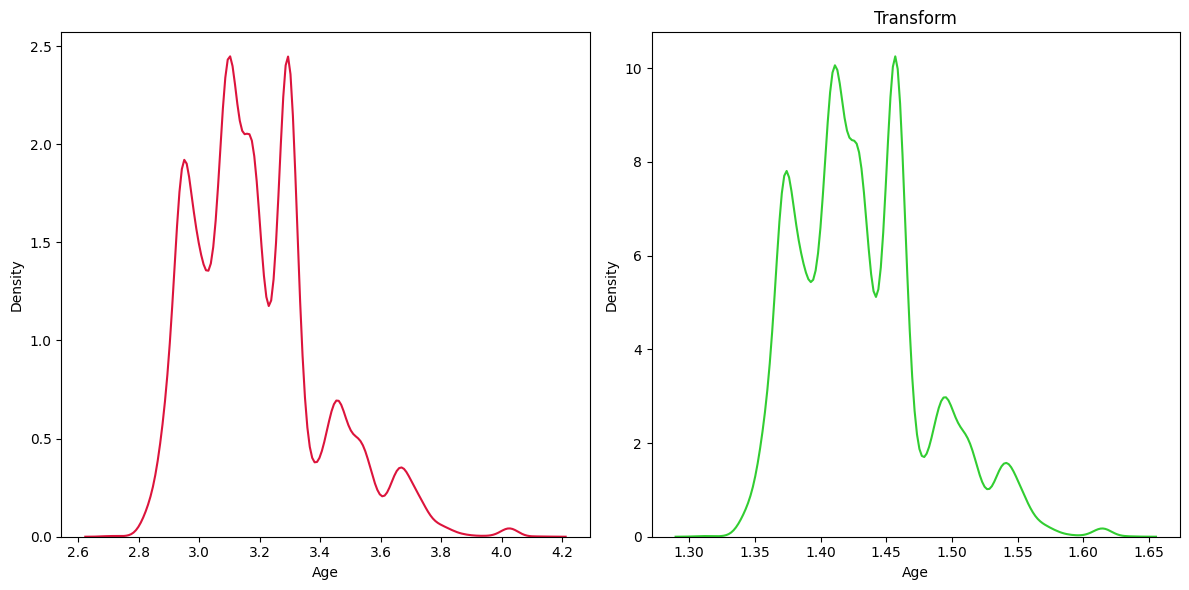

In [42]:
apply_transform(lambda x:x**2,'Age')

`reciprocal func`

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



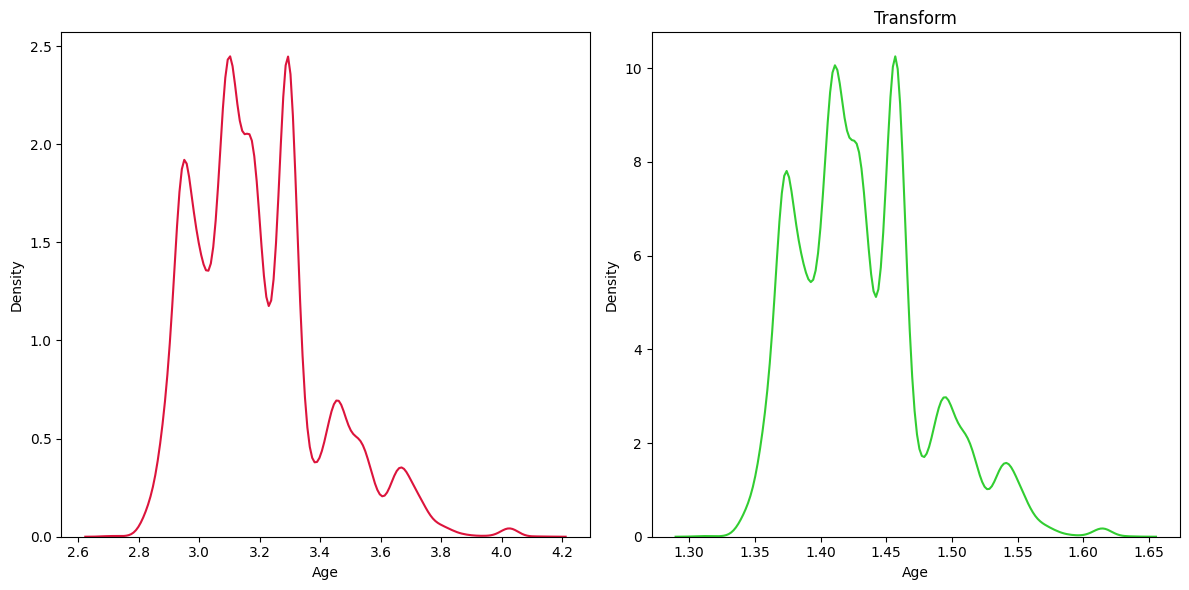

In [43]:
apply_transform(lambda x:(x**1/2),'Age')

`inverse func`

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



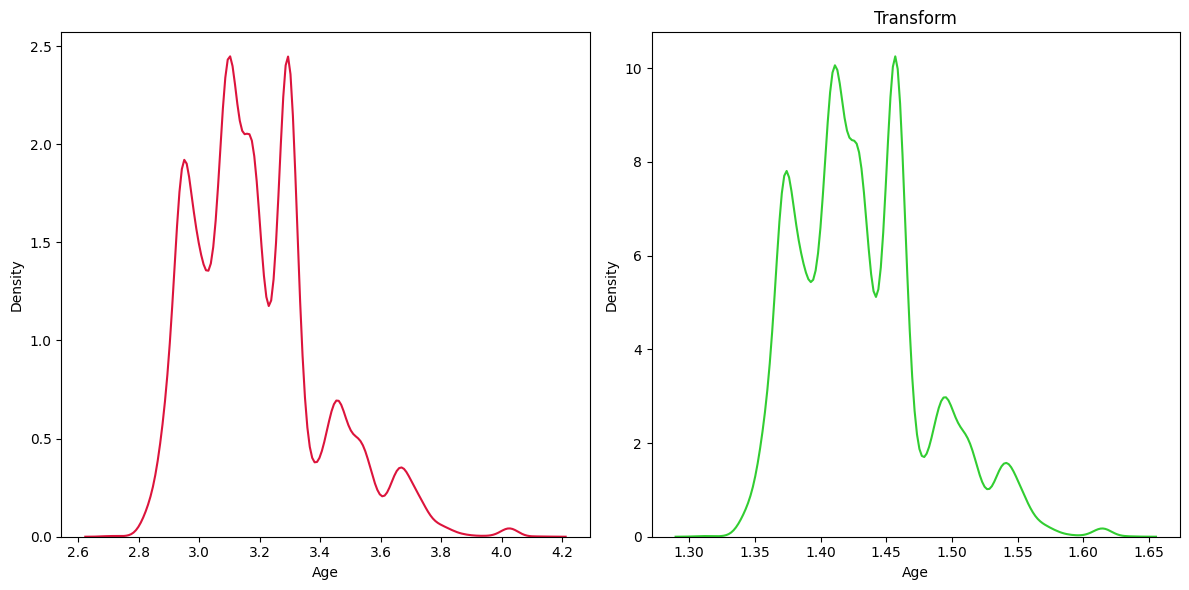

In [44]:
apply_transform(lambda x:(1/x),'Age')

`sin func`

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



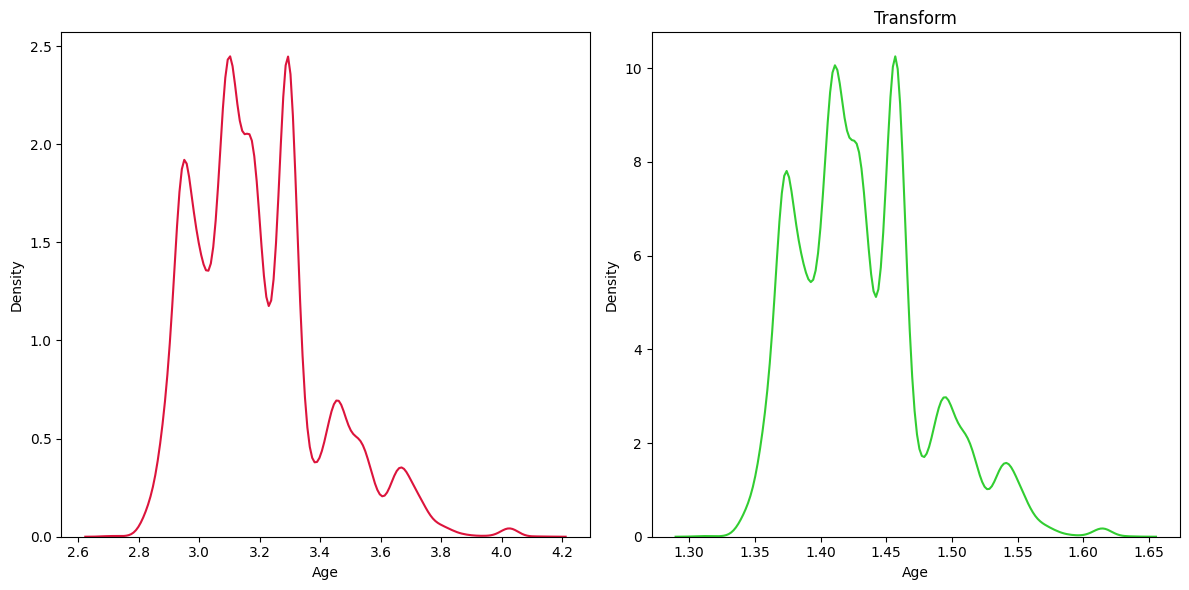

In [45]:
apply_transform(np.sin,'Age')

`Not getting much response by applying the transformation in 'Age' column`

**Now checking the distribution of each column**

In [46]:
import plotly.figure_factory as ff

In [47]:
num_col = ['FCVC','NCP','CH2O','FAF','TUE']

x1 = train['FCVC']
x2 = train['NCP']
x3 = train['CH2O']
x4 = train['FAF']
x5 = train['TUE']

# Group data together
hist_data = [x1, x2, x3, x4, x5]

group_labels = ['FCVC','NCP','CH2O','FAF','TUE']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

`Here almost every column is kind of skewed`

**So, let's we first tranform them and after that we'll discretized them**

**Transforming each numerical column by log func**

In [48]:
num_col = ['FCVC','NCP','CH2O','FAF','TUE']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



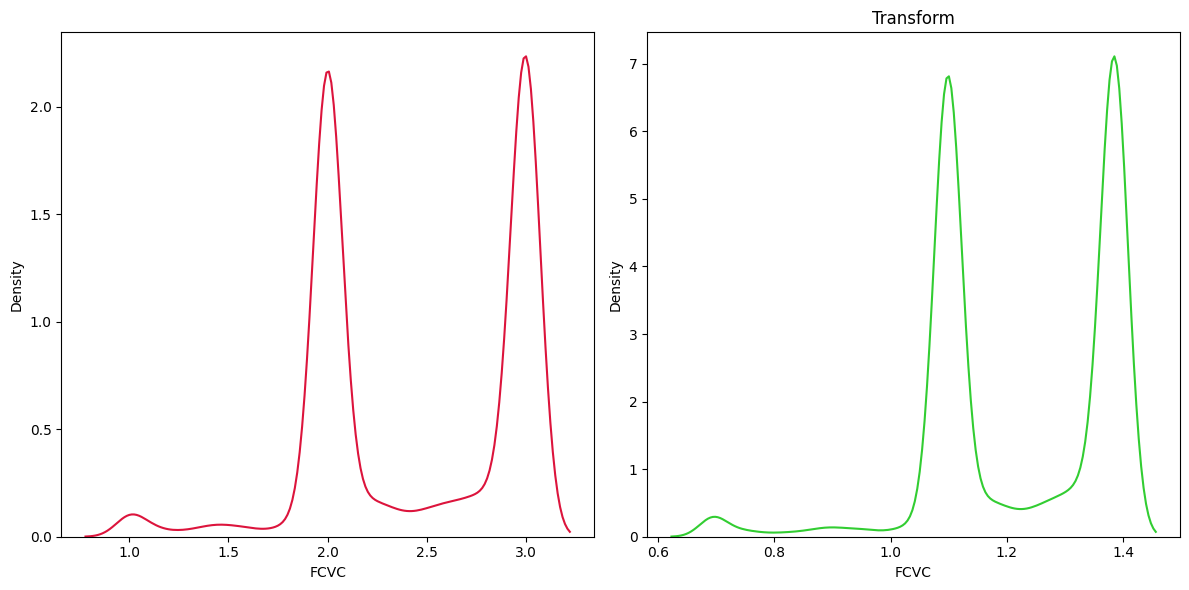

In [49]:
apply_transform(np.log1p,'FCVC')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



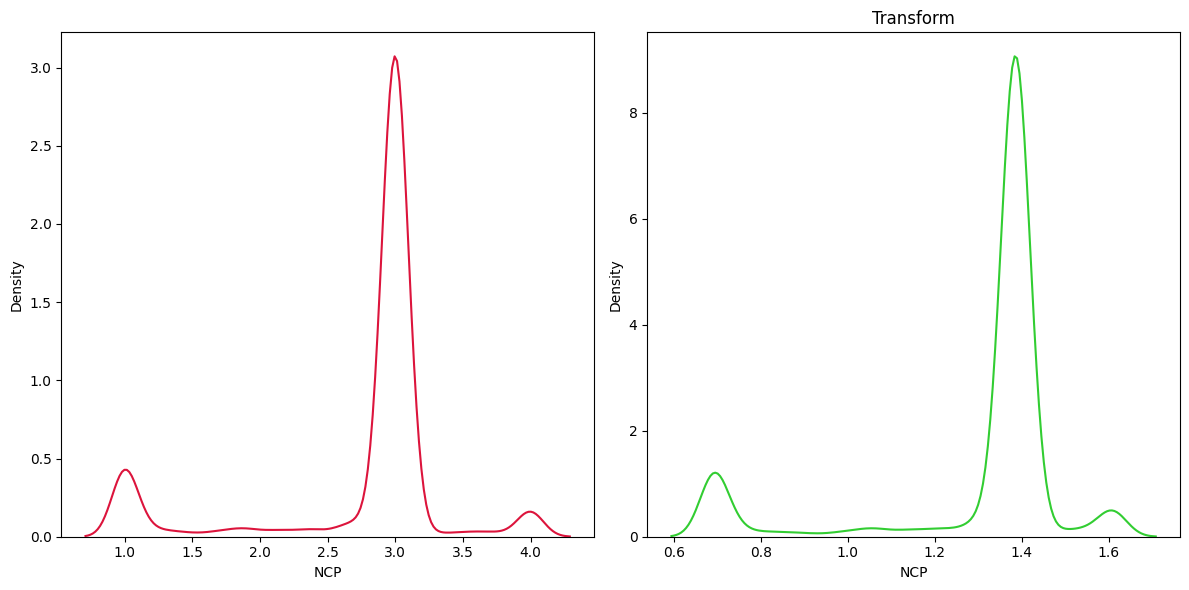

In [50]:
apply_transform(np.log1p,'NCP')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



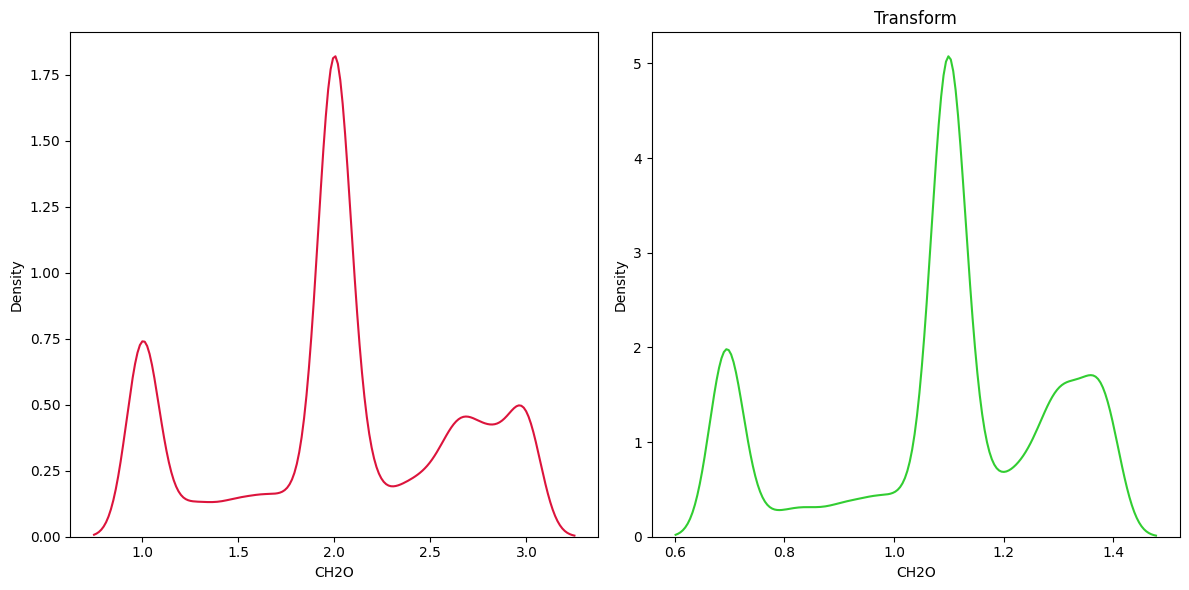

In [51]:
apply_transform(np.log1p,'CH2O')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



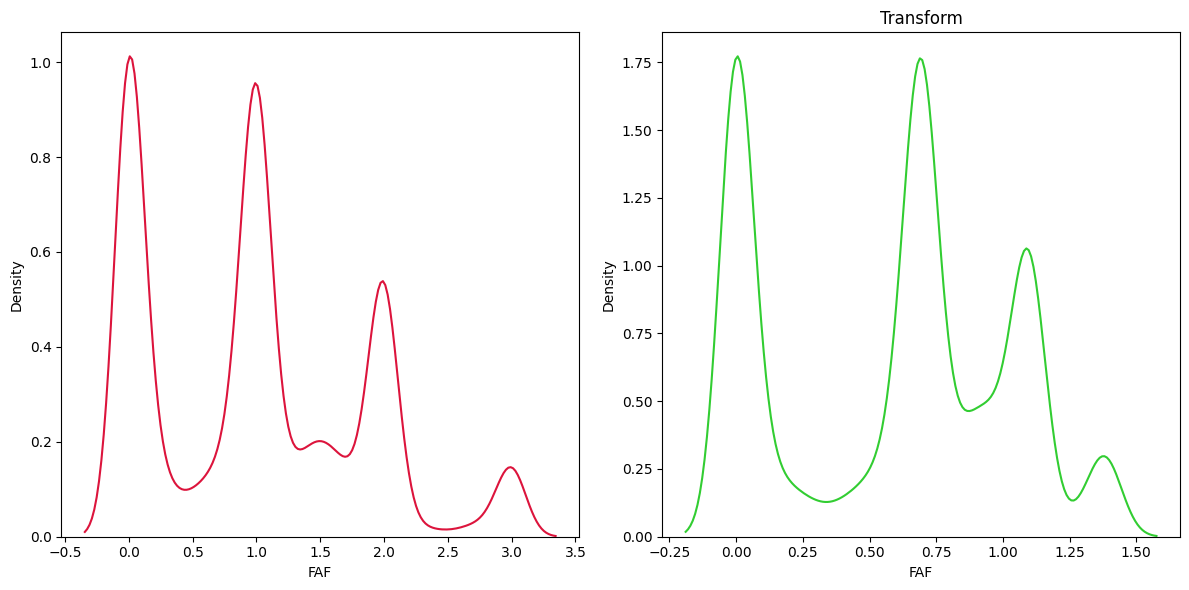

In [52]:
apply_transform(np.log1p,'FAF')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



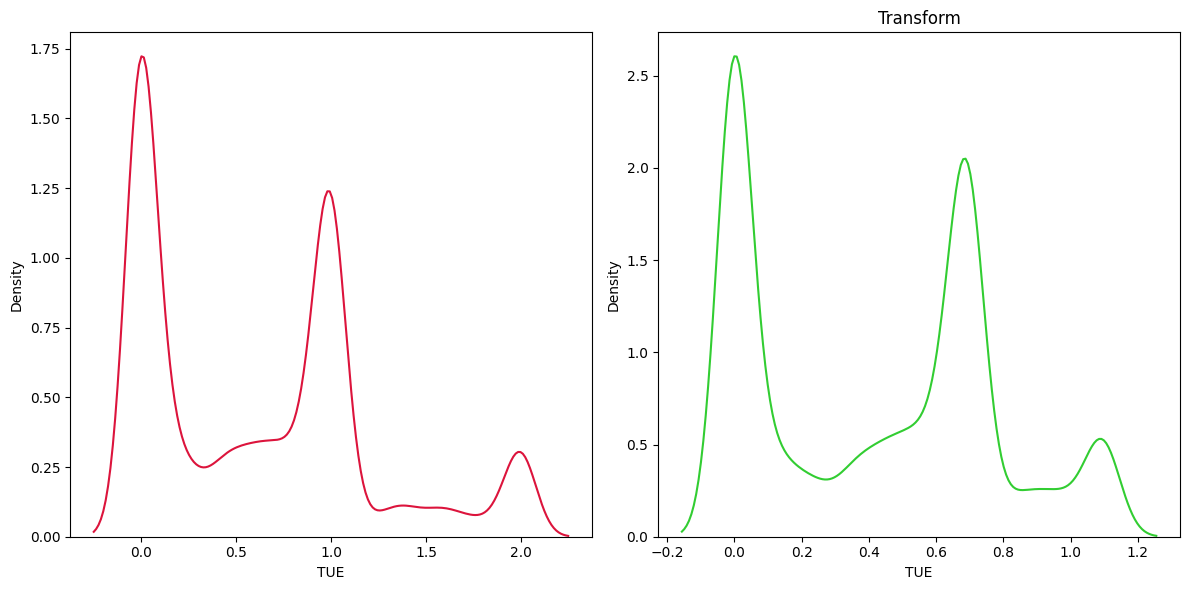

In [53]:
apply_transform(np.log1p,'TUE')

`After applying transformation there is no visible improvement was obsevered so, now we moved to our next step`

**Discretization (Numerical column)**

In [54]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

train['Age'] = kb.fit_transform(train[['Age']])
train['Height'] = kb.fit_transform(train[['Height']])
train['Weight'] = kb.fit_transform(train[['Weight']])
train['FAF'] = kb.fit_transform(train[['FAF']])
train['FCVC'] = kb.fit_transform(train[['FCVC']])
train['CH2O'] = kb.fit_transform(train[['CH2O']])
train['NCP'] = kb.fit_transform(train[['NCP']])
train['TUE'] = kb.fit_transform(train[['TUE']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-

`Here all numerical column are discretize`

**Encoding the categorical columns**

In [55]:
train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [56]:
train['FAVC'].unique()

array(['yes', 'no'], dtype=object)

In [57]:
train['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [58]:
cat_col = [['Gender','NObeyesdad','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']]

In [59]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

oe = OrdinalEncoder()

train['Gender'] = oe.fit_transform(train[['Gender']])
train['NObeyesdad'] = oe.fit_transform(train[['NObeyesdad']])
train['family_history_with_overweight'] = oe.fit_transform(train[['family_history_with_overweight']])
train['FAVC'] = oe.fit_transform(train[['FAVC']])
train['CAEC'] = oe.fit_transform(train[['CAEC']])
train['SMOKE'] = oe.fit_transform(train[['SMOKE']])
train['SCC'] = oe.fit_transform(train[['SCC']])
train['CALC'] = oe.fit_transform(train[['CALC']])
train['MTRANS'] = oe.fit_transform(train[['MTRANS']])

In [60]:
train

id  Gender  Age  Height  Weight  family_history_with_overweight  \
0          0     1.0  6.0     4.0     4.0                             1.0   
1          1     0.0  1.0     0.0     1.0                             1.0   
2          2     0.0  1.0     5.0     0.0                             1.0   
3          3     0.0  2.0     5.0     9.0                             1.0   
4          4     1.0  9.0     9.0     5.0                             1.0   
...      ...     ...  ...     ...     ...                             ...   
20753  20753     1.0  6.0     7.0     8.0                             1.0   
20754  20754     1.0  1.0     5.0     0.0                             0.0   
20755  20755     1.0  2.0     9.0     6.0                             1.0   
20756  20756     1.0  9.0     5.0     4.0                             1.0   
20757  20757     1.0  8.0     8.0     8.0                             1.0   

       FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  \
0       1.0   1.0  2.0   2.0    0.0   4.0  0.0  0.0  3.0   1.0     3.0   
1       1.0   1.0  3.0   1.0    0.0   2.0  0.0  3.0  4.0   2.0     0.0   
2       1.0   0.0  1.0   2.0    0.0   1.0  0.0  1.0  5.0   2.0     3.0   
3       1.0   3.0  3.0   2.0    0.0   1.0  0.0  4.0  2.0   1.0     3.0   
4       1.0   2.0  1.0   2.0    0.0   1.0  0.0  5.0  3.0   1.0     3.0   
...     ...   ...  ...   ...    ...   ...  ...  ...  ...   ...     ...   
20753   1.0   2.0  3.0   2.0    0.0   2.0  0.0  3.0  0.0   1.0     3.0   
20754   1.0   3.0  3.0   1.0    0.0   0.0  0.0  6.0  4.0   1.0     3.0   
20755   1.0   2.0  3.0   2.0    0.0   2.0  0.0  3.0  4.0   2.0     3.0   
20756   1.0   2.0  1.0   2.0    0.0   2.0  0.0  0.0  3.0   2.0     0.0   
20757   1.0   3.0  3.0   2.0    0.0   2.0  0.0  1.0  2.0   1.0     3.0   

       NObeyesdad  
0             6.0  
1             1.0  
2             0.0  
3             4.0  
4             6.0  
...           ...  
20753         3.0  
20754         0.0  
20755         3.0  
20756         6.0  
20757         3.0  

[20758 rows x 18 columns]

In [61]:
train.drop(['id','CALC'],axis=1,inplace=True)

In [62]:
train

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  \
0         1.0  6.0     4.0     4.0                             1.0   1.0   
1         0.0  1.0     0.0     1.0                             1.0   1.0   
2         0.0  1.0     5.0     0.0                             1.0   1.0   
3         0.0  2.0     5.0     9.0                             1.0   1.0   
4         1.0  9.0     9.0     5.0                             1.0   1.0   
...       ...  ...     ...     ...                             ...   ...   
20753     1.0  6.0     7.0     8.0                             1.0   1.0   
20754     1.0  1.0     5.0     0.0                             0.0   1.0   
20755     1.0  2.0     9.0     6.0                             1.0   1.0   
20756     1.0  9.0     5.0     4.0                             1.0   1.0   
20757     1.0  8.0     8.0     8.0                             1.0   1.0   

       FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  MTRANS  NObeyesdad  
0       1.0  2.0   2.0    0.0   4.0  0.0  0.0  3.0     3.0         6.0  
1       1.0  3.0   1.0    0.0   2.0  0.0  3.0  4.0     0.0         1.0  
2       0.0  1.0   2.0    0.0   1.0  0.0  1.0  5.0     3.0         0.0  
3       3.0  3.0   2.0    0.0   1.0  0.0  4.0  2.0     3.0         4.0  
4       2.0  1.0   2.0    0.0   1.0  0.0  5.0  3.0     3.0         6.0  
...     ...  ...   ...    ...   ...  ...  ...  ...     ...         ...  
20753   2.0  3.0   2.0    0.0   2.0  0.0  3.0  0.0     3.0         3.0  
20754   3.0  3.0   1.0    0.0   0.0  0.0  6.0  4.0     3.0         0.0  
20755   2.0  3.0   2.0    0.0   2.0  0.0  3.0  4.0     3.0         3.0  
20756   2.0  1.0   2.0    0.0   2.0  0.0  0.0  3.0     0.0         6.0  
20757   3.0  3.0   2.0    0.0   2.0  0.0  1.0  2.0     3.0         3.0  

[20758 rows x 16 columns]

**Let's check the correlation in numerical column**

<Axes: >

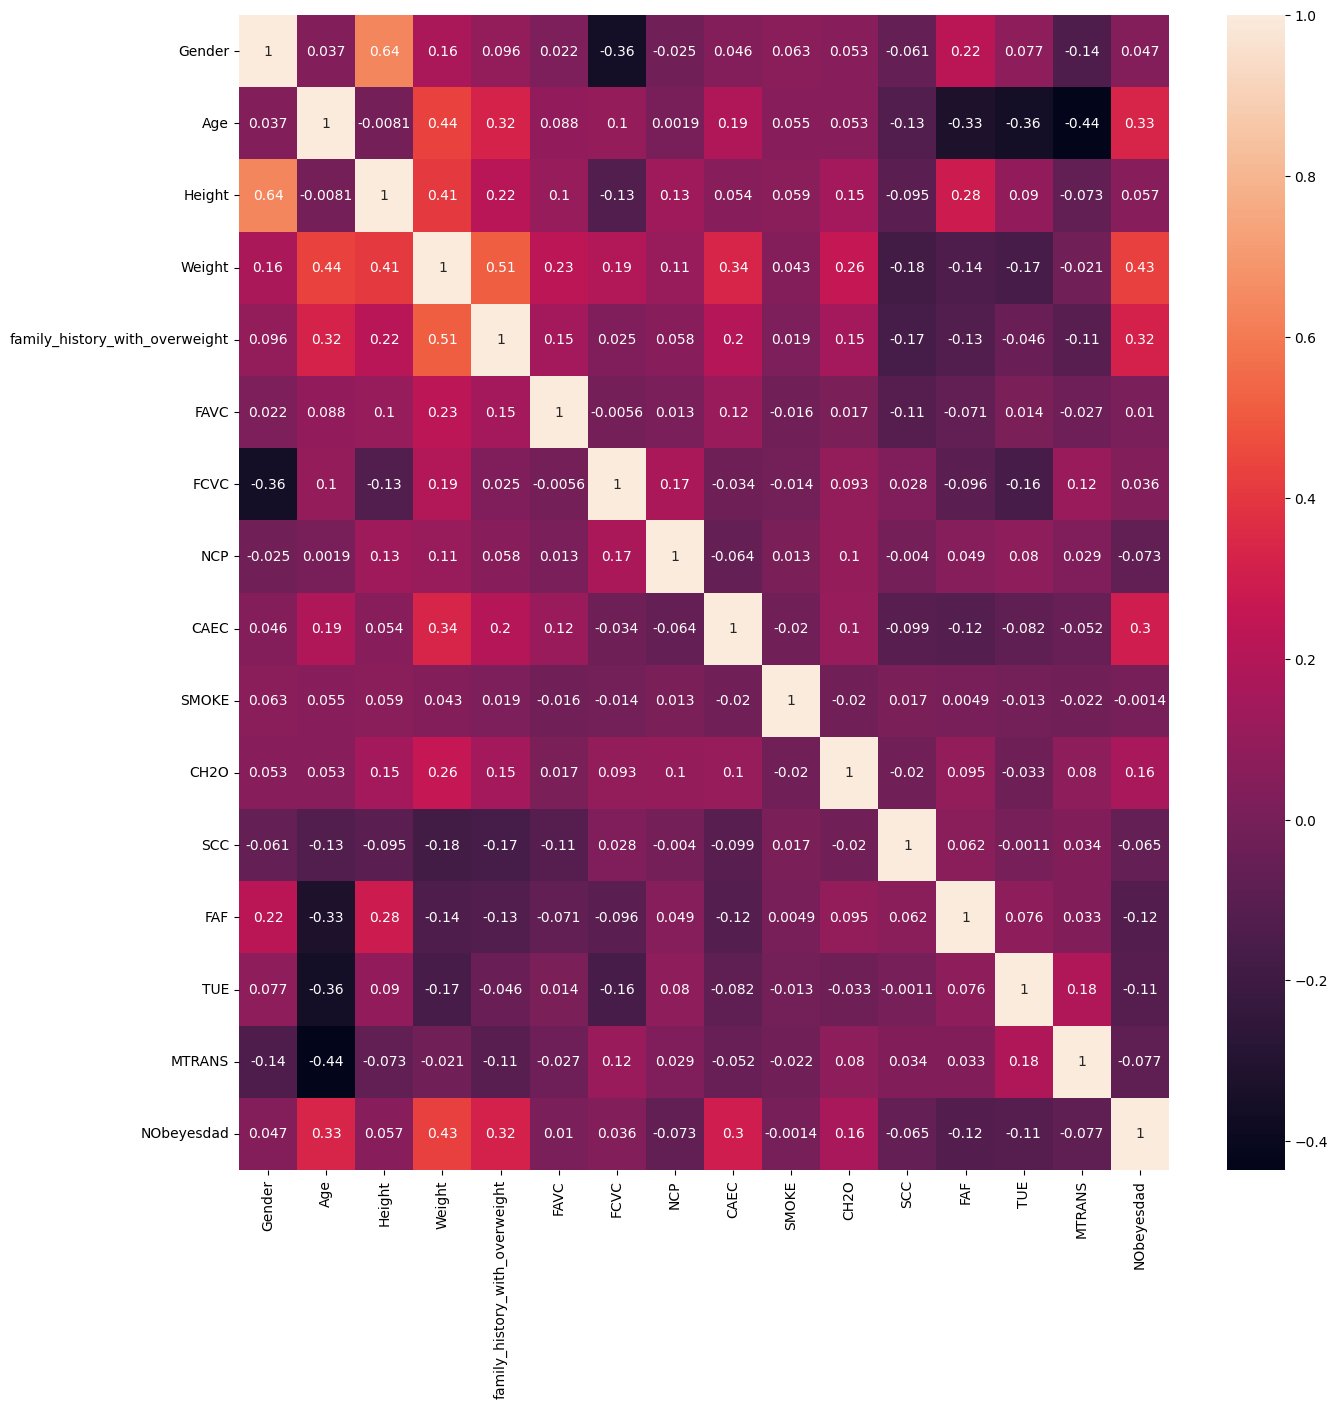

In [63]:
train_corr = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(train_corr,annot=True)

`After analizing the correlation heatmap we could see that : CH2O,CAEC,family_history_with_overweight,Age,Weight are positively correlated`

**Applying Feature Selection Technique to see what column are important**

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
sfs = SFS(lr,k_features='best',forward=False,scoring='accuracy',cv=5,floating=False)

sfs.fit(X_train,y_train)

sel = EFS(lr,max_features=5,scoring='accuracy',cv=5)

model = sel.fit(X_train,y_train)


`Due to high dimension of data our FeatureSelector is not able to generate the answer so, we take all the columns to predict the values`

**Directly fitting all column in our model**

In [ ]:
from sklean.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [ ]:
X = train.drop('NObeyesdad',axis=1)
y = train['NObeyesdad']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

**If we take only the feature which having a positive relation with our target column**

In [ ]:
X = train[['CH2O','CAEC','family_history_with_overweight','Age','Weight']]
y = train['NObeyesdad']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred1 = lr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

**So, Instead of taking positive related column we'll take all the columns**